In [1]:
import torch
from torch.utils.model_zoo import load_url
from seq2seq.models import Img2Seq
from seq2seq.tools.inference import CaptionGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.misc import imresize


In [2]:
# checkpoint = load_url('https://dl.dropboxusercontent.com/s/05dvriaiqk74cum/caption_resnet50-4c0fa803.pth',
#                       map_location={'gpu:0':'cpu'})
checkpoint = torch.load('results/captions_resnet50/model_best.pth.tar',map_location={'gpu:0':'cpu'})

model = Img2Seq(**checkpoint['config'].model_config)
model.load_state_dict(checkpoint['state_dict'])
img_transform, target_tok = checkpoint['tokenizers'].values()
caption_model = CaptionGenerator(model=model,
                               img_transform=img_transform(allow_var_size=True, train=False),
                               target_tok=target_tok,
                               beam_size=12,
                               get_attention=True,
                               length_normalization_factor=0.4, cuda=False)

def show_and_tell(filename):
    img = Image.open(filename, 'r')
    
    %matplotlib inline
    plt.figure()
    plt.imshow(np.asarray(img))

    
    return img, caption_model.describe(img)

def visualize_attention(img, attention, max_size=128., thresh=0.5):
    img = np.asarray(img)
    W, H = img.shape[1], img.shape[0]
    ratio = max_size / max(W,H)
    W, H = int(W*ratio), int(H*ratio)
    img = imresize(img, (H,W))
    attention, preds = attention
    fig, plots = plt.subplots(len(preds), 1, figsize=(100, 40))
    for i, p in enumerate(preds):
        resized_attention = imresize(attention[i].data.cpu().numpy(), (H,W))
        resized_attention = resized_attention / resized_attention.max()
        mask = resized_attention > thresh
        masked_img = img * mask[:,:,None]
        plots[i].set_title(p)
        plots[i].imshow(masked_img)
    plt.tight_layout()
    plt.show()

C:\Users\olegz\Anaconda3\lib\site-packages\torch\cuda\__init__.py:116: UserWarning: 
    Found GPU0 GeForce GTX 960M which is of cuda capability 5.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


A baseball player holding a baseball bat on a field.


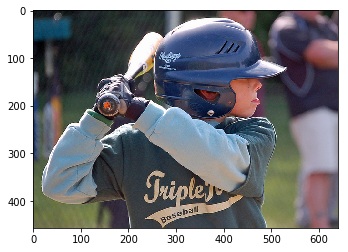

In [3]:
img, (caption, attentions) = show_and_tell('../COCO_val2014_000000200348.jpg')
print(caption)

A group of people flying kites on the beach.


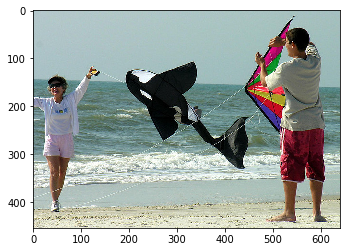

In [4]:
img, (caption, attentions) = show_and_tell('..//COCO_val2014_000000400033.jpg')
print(caption)

A man riding a wave on a surfboard in the water.


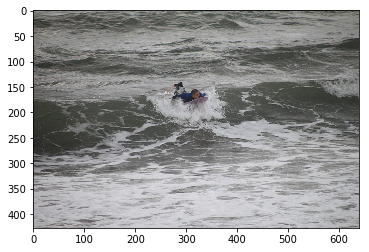

In [5]:
img, (caption, attentions) = show_and_tell('../COCO_val2014_000000164292.jpg')
print(caption)

A pickup truck parked in a parking lot.


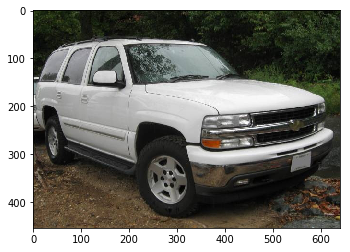

In [6]:
img, (caption, attentions) = show_and_tell('../123.jpg')
print(caption)

A group of people riding horses down a street.


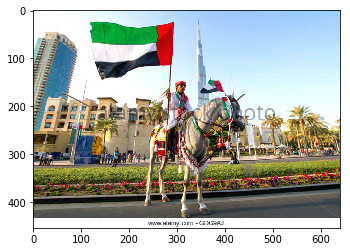

In [7]:
img, (caption, attentions) = show_and_tell('../aravi.jpg')
print(caption)

A baby is playing with a teddy bear.


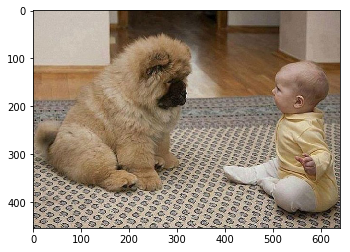

In [8]:
img, (caption, attentions) = show_and_tell('../baby&dog.jpg')
print(caption)

A stuffed teddy bear sitting on a bed.


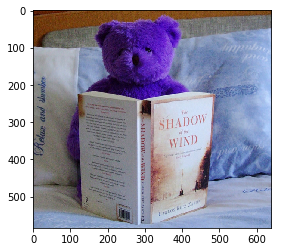

In [9]:
img, (caption, attentions) = show_and_tell('../tbear_read.jpg')
print(caption)

A man riding a horse on a street.


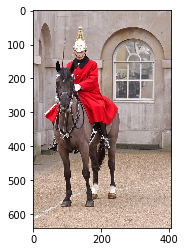

In [10]:
img, (caption, attentions) = show_and_tell('../COCO_man_horse.jpg')
print(caption)

A dog in a field playing in a park.


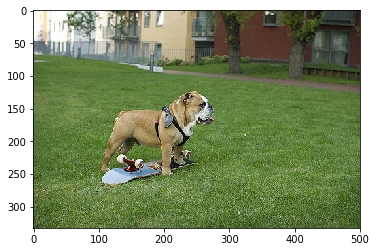

In [11]:
img, (caption, attentions) = show_and_tell('../dog_skateboard.jpg')
print(caption)

A dog is playing with a soccer ball.


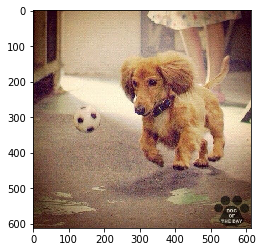

In [12]:
img, (caption, attentions) = show_and_tell('../dog_soccer.jpg')
print(caption)

A giraffe standing in the middle of a field.


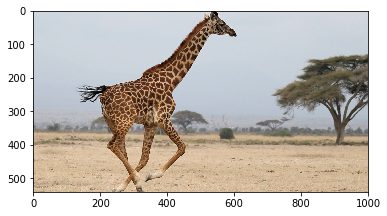

In [13]:
img, (caption, attentions) = show_and_tell('../giraffe.jpg')
print(caption)

A herd of cattle grazing in a dirt field.


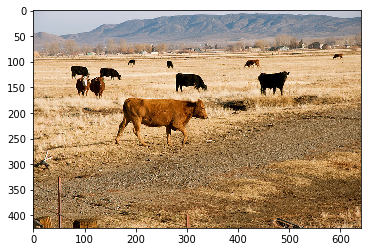

In [15]:
img, (caption, attentions) = show_and_tell('../cows.jpg')
print(caption)

In [ ]:
visualize_attention(img, attentions)